In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel('Referencias_autores.xlsx')

In [3]:
df = df[~((df['autores'] == df['year']) & (df['year'] == df['titulo']))]


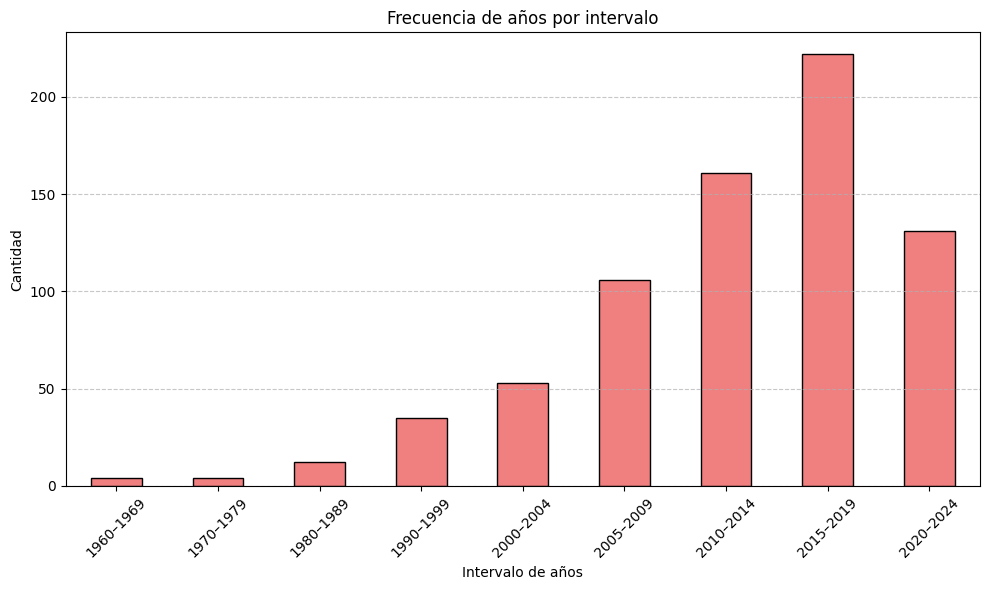

In [7]:
# Función para clasificar en intervalos
def clasificar_intervalo(year):
    if 1960 <= year <= 1969:
        return '1960–1969'
    elif 1970 <= year <= 1979:
        return '1970–1979'
    elif 1980 <= year <= 1989:
        return '1980–1989'
    elif 1990 <= year <= 1999:
        return '1990–1999'
    elif 2000 <= year <= 2024:
        # Intervalos de 5 años a partir de 2000
        start = 2000 + 5 * ((year - 2000) // 5)
        end = start + 4
        return f'{start}–{end}'
    else:
        return 'Otro'

# Aplicar clasificación
df['intervalo'] = df['year'].apply(clasificar_intervalo)

# Contar por intervalo
conteo = df['intervalo'].value_counts().sort_index()

# Graficar
plt.figure(figsize=(10, 6))
conteo.plot(kind='bar', color='lightcoral', edgecolor='black')
plt.title('Frecuencia de años por intervalo')
plt.xlabel('Intervalo de años')
plt.ylabel('Cantidad')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



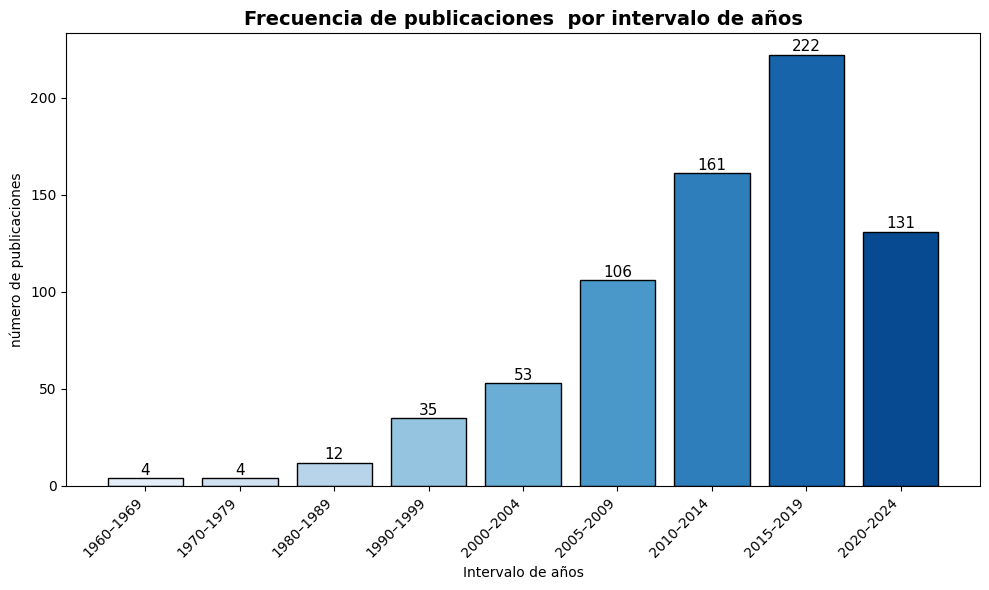

In [ ]:
# Función para clasificar los años en intervalos personalizados
def clasificar_intervalo(year):
    if 1960 <= year <= 1969:
        return '1960–1969'
    elif 1970 <= year <= 1979:
        return '1970–1979'
    elif 1980 <= year <= 1989:
        return '1980–1989'
    elif 1990 <= year <= 1999:
        return '1990–1999'
    elif 2000 <= year <= 2024:
        inicio = 2000 + 5 * ((year - 2000) // 5)
        fin = inicio + 4
        return f'{inicio}–{fin}'
    else:
        return 'Otro'

# Aplicar la función
df['intervalo'] = df['year'].apply(clasificar_intervalo)

# Contar frecuencia por intervalo y ordenar por orden cronológico
categorias_ordenadas = ['1960–1969', '1970–1979', '1980–1989', '1990–1999',
                        '2000–2004', '2005–2009', '2010–2014', '2015–2019', '2020–2024']
conteo = df['intervalo'].value_counts().reindex(categorias_ordenadas, fill_value=0)

# Crear gráfico
plt.figure(figsize=(10, 6))
colors = sns.color_palette("Blues", len(conteo))
bars = plt.bar(conteo.index, conteo.values, color=colors, edgecolor='black')

# Añadir etiquetas sobre las barras
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.2, int(height),
             ha='center', va='bottom', fontsize=11)

# Estética
plt.title('Número de publicaciones por intervalo de años', fontsize=14, weight='bold')
plt.xlabel('Intervalo de años')
plt.ylabel('Número de publicaciones')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Mostrar gráfico
plt.show()

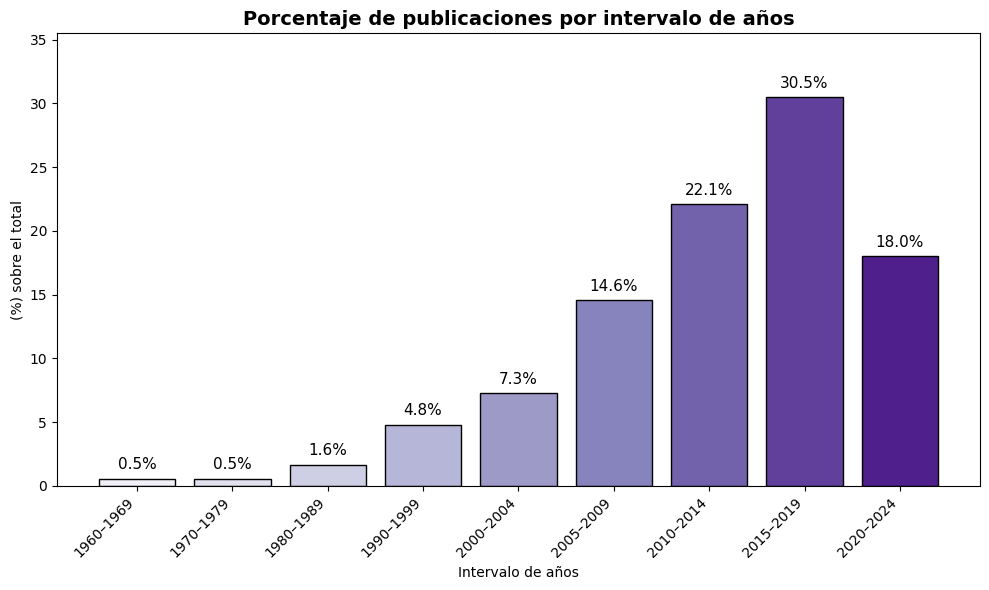

In [14]:
# Función de clasificación por intervalo personalizado
def clasificar_intervalo(year):
    if 1960 <= year <= 1969:
        return '1960–1969'
    elif 1970 <= year <= 1979:
        return '1970–1979'
    elif 1980 <= year <= 1989:
        return '1980–1989'
    elif 1990 <= year <= 1999:
        return '1990–1999'
    elif 2000 <= year <= 2024:
        start = 2000 + 5 * ((year - 2000) // 5)
        end = start + 4
        return f'{start}–{end}'
    else:
        return 'Otro'

# Aplicar la función
df['intervalo'] = df['year'].apply(clasificar_intervalo)

# Definir orden de categorías esperado
categorias_ordenadas = ['1960–1969', '1970–1979', '1980–1989', '1990–1999',
                        '2000–2004', '2005–2009', '2010–2014', '2015–2019', '2020–2024']

# Conteo absoluto y relativo
conteo_abs = df['intervalo'].value_counts().reindex(categorias_ordenadas, fill_value=0)
conteo_pct = (conteo_abs / conteo_abs.sum()) * 100  # calcular porcentajes

# Graficar
plt.figure(figsize=(10, 6))
colors = sns.color_palette("Purples", len(conteo_pct))
bars = plt.bar(conteo_pct.index, conteo_pct.values, color=colors, edgecolor='black')

# Etiquetas de porcentaje sobre las barras
for bar, pct in zip(bars, conteo_pct.values):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.5, f'{pct:.1f}%',
             ha='center', va='bottom', fontsize=11)

# Estética general
plt.title('Porcentaje de publicaciones por intervalo de años', fontsize=14, weight='bold')
plt.xlabel('Intervalo de años')
plt.ylabel('(%) sobre el total')
plt.xticks(rotation=45, ha='right')
plt.ylim(0, conteo_pct.max() + 5)  # margen superior
plt.tight_layout()

# Mostrar gráfico
plt.show()